In [19]:
# Loaded variable 'df' from URI: f:\MultiDimensionalAD\W1-Classify\long_run_varying_flows_labelled.csv
import pandas as pd
# df = pd.read_csv(r'f:\MultiDimensionalAD\W1-Classify\long_run_labelled.csv')

# df = pd.read_csv(r'F:\MultiDimensionalAD\data\processed_data.csv')

df = pd.read_csv(r'F:\MultiDimensionalAD\data\real_time_MKPL\202505231524GMT+5x30.h24.csv')

In [20]:
# glabally set all plot sizes to 12, 5
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

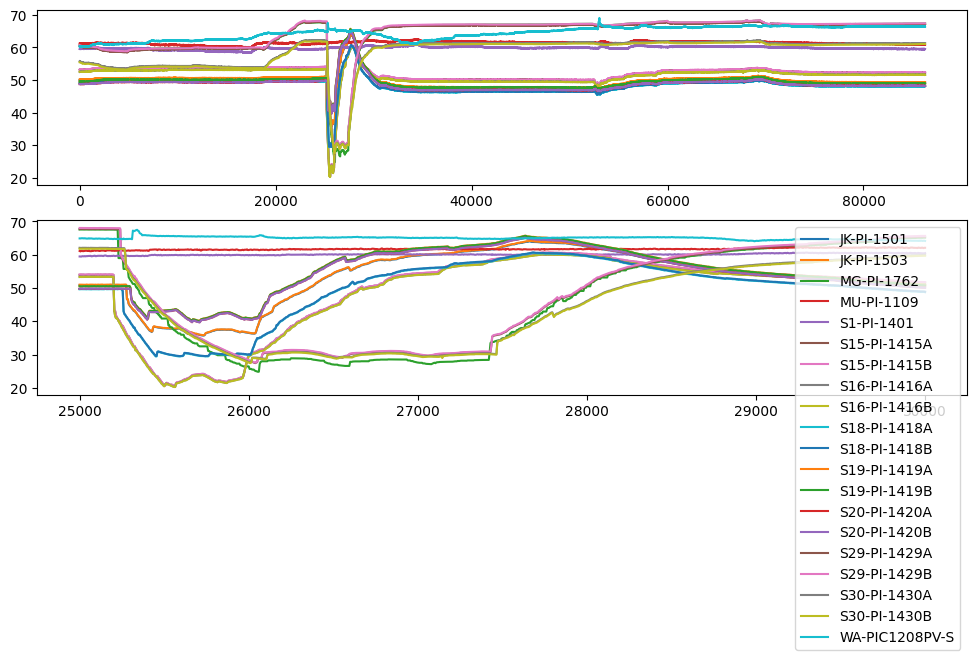

In [70]:
# plot all sensors that have PI/PT?TI/TT in their names
sensors = [col for col in df.columns if 'PI' in col or 'PT' in col or 'TI' in col or 'TT' in col]

# sensors = [col for col in df.columns if 'TS' in col or 'PS' in col]
# max = 5
# cnt = 0


fig, ax = plt.subplots(2, 1)
for sensor in sensors:
    # if max(df[sensor]) <= 50:
    # plot values between df['Seconds'] from 20000 to 40000 only, not index, but all points when seconds is between 20000 and 40000
    mask = (df['Seconds'] >= 25000) & (df['Seconds'] <= 30000)
    if max(df[sensor].values) >= 60:

        ax[0].plot(df['Seconds'], df[sensor])
        ax[1].plot(df['Seconds'][mask], df[sensor][mask], label = sensor)
    # cnt += 1
    # if cnt > max:
    #     break

plt.legend()
plt.show()


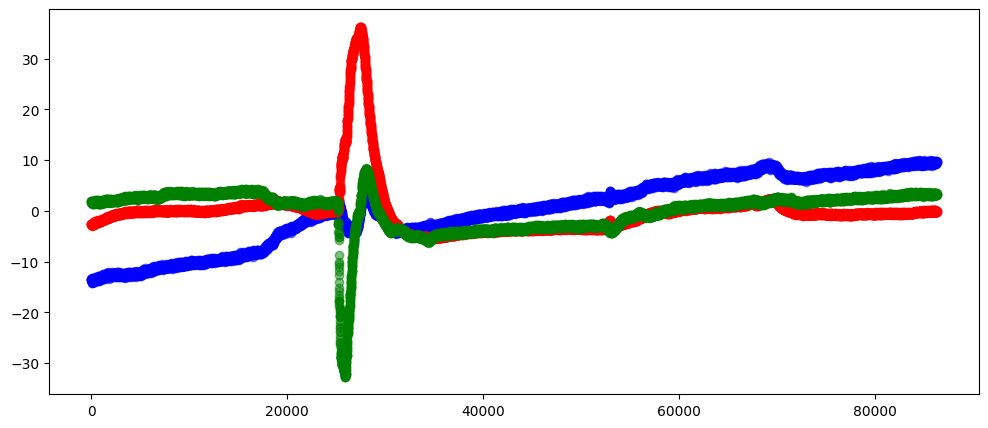

In [29]:
# run PCA model on these snesors array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sensor_data = df[sensors].dropna()

scaled_data = StandardScaler().fit_transform(sensor_data)

pca_data = PCA(n_components=3).fit_transform(scaled_data)

plt.scatter(df['Seconds'], pca_data[:, 0], c='blue', alpha=0.5)
plt.scatter(df['Seconds'], pca_data[:, 1], c='red', alpha=0.5)
plt.scatter(df['Seconds'], pca_data[:, 2], c='green', alpha=0.5)

In [46]:
# USE PLOTLY TO PLOT INTERACTIVE 3D SCATTER PLOT
import plotly.express as px
# maskmust be colored with red, rest all blue in df[]['Seconds']
color_map = ['red' if (s >= 25000 and s <= 30000) else 'blue' for s in df['Seconds']]
fig = px.scatter_3d(x=pca_data[:, 0], y=pca_data[:, 1], z=pca_data[:, 2], color=color_map, opacity=0.1, labels={'x': 'PCA 1', 'y': 'PCA 2', 'z': 'PCA 3'}, title='3D PCA Scatter Plot of Sensor Data')
fig.show()

In [51]:
# predict lenght of pipeline based on sensor data and pressure drops between piplines, there is no such data in this dataset yet
# so we'll use and check how can we mesearure pressure drops across sensors, and see which sensor are the nearest to each other in terms of physical distance

import numpy as np
dict = {} # key - sensor _name, value - nearest sensor name based on pressure drop

for sensor in sensors:
    min_diff = float('inf')
    nearest_sensor = None
    for other_sensors in sensors:
        if sensor != other_sensors and '-P' in sensor and '-P' in other_sensors:
            diff = abs(np.mean(df[sensor]) - np.mean(df[other_sensors]))
            if diff < min_diff:
                min_diff = diff
                nearest_sensor = other_sensors
        if sensor != other_sensors and '-T' in sensor and '-T' in other_sensors:
            diff = abs(np.mean(df[sensor]) - np.mean(df[other_sensors]))
            if diff < min_diff:
                min_diff = diff
                nearest_sensor = other_sensors            
    dict[sensor] = nearest_sensor

import pprint
pprint.pprint(dict)

# dict to json
import json

with open('nearest.json', 'w') as f:
    json.dump(dict, f, indent = 4)

f.close()



{'GU-PI-1901': 'MA-PI-1307',
 'GU-PI-1915': 'S15-PI-1415B',
 'GU-TI-1901': 'S25-TI-1425B',
 'GU-TI-1905': 'WA-TI-1201',
 'I1-PI-2105': 'S19-PI-1419B',
 'I1-PI-2107': 'I1-PI-2105',
 'I1-TI-2105': 'I1-TI-2106',
 'I1-TI-2106': 'S33-TI-1433A',
 'I2-PI-2205': 'S21-PI-1421A',
 'I2-TI-2205': 'S32-TI-1432A',
 'JK-PI-1501': 'S19-PI-1419A',
 'JK-PI-1503': 'JK-PI-1501',
 'JK-TI-1501': 'S18-TI-1418B',
 'JK-TI-1503': 'JK-TI-1501',
 'JW-PI-1601': 'JW-PI-1603',
 'JW-PI-1603': 'JW-PI-1601',
 'JW-TI-1601': 'S25-TI-1425A',
 'JW-TI-1606': 'SA-TI-1805',
 'MA-PI-1307': 'GU-PI-1901',
 'MA-PI-1359': 'S33-PI-1433B',
 'MA-TI-1301': 'WA-TI-1201',
 'MA-TI-1354': 'S8-TI-1408',
 'MG-PI-1701': 'WA-PI-1201',
 'MG-PI-1762': 'S29-PI-1429A',
 'MG-TI-1701': 'S29-TI-1429B',
 'MG-TI-1754': 'S14-TI-1414',
 'MU-PI-1109': 'S1-PI-1401',
 'MU-TI-1104': 'S6-TI-1406',
 'S1-PI-1401': 'S30-PI-1430A',
 'S1-TI-1401': 'S2-TI-1402',
 'S10-PI-1410': 'S6-PI-1406',
 'S10-TI-1410': 'S11-TI-1411',
 'S11-PI-1411': 'S28-PI-1428A',
 'S11-TI-1

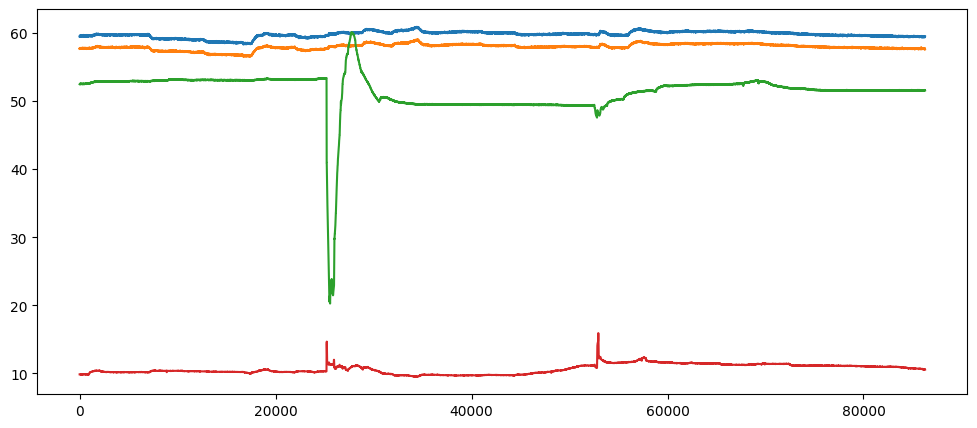

In [72]:
plt.plot(df['Seconds'], df['S1-PI-1401'])
plt.plot(df['Seconds'], df['S2-PI-1402'])
plt.plot(df['Seconds'], df['S16-PI-1416A'])
plt.plot(df['Seconds'], df['S14-PI-1414'])

plt.show()